## Import Libraries


In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the dataset

In [159]:
# Load the dataset
raw_data = "spotify_subscription.csv"
df = pd.read_csv(raw_data)

In [160]:
df # will show whole data

,user_id,age,country,device,subscription_plan,subscription_length_months,auto_renewal,monthly_active_days,avg_session_duration_min,num_songs_streamed,payment_method,num_failed_payments,discount_used,churn
0,1,31,INDIA,Android,family,26,0,1,92.0,128.0,Credit Card,0.0,Yes,No
1,2,25,Germany,iOS,Free,27,1,10,110.6,785.0,NaN,2.0,0,No
2,3,44,United States,iOS,premium,31,0,0,53.4,881.0,crypto,NaN,1,No
3,4,52,INDIA,Android,family,49,0,14,27.9,616.0,Google Pay,1.0,Yes,Yes
4,5,60,United States,Android,family,13,0,18,24.4,826.0,crypto,-1.0,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,52,france,Android,Student,17,0,9,19.1,64.0,Google Pay,-1.0,Yes,No
9996,9997,34,france,iOS,premium,16,1,6,59.7,659.0,NaN,-1.0,NaN,No
9997,9998,20,canada,Android,premium,48,0,7,112.6,848.0,Credit Card,1.0,0,No
9998,9999,34,UK,Ios,PREMIUM,53,1,13,6.0,693.0,paypal,0.0,NaN,churned


In [161]:
# to read first few lines of data
df.head()

,user_id,age,country,device,subscription_plan,subscription_length_months,auto_renewal,monthly_active_days,avg_session_duration_min,num_songs_streamed,payment_method,num_failed_payments,discount_used,churn
0,1,31,INDIA,Android,family,26,0,1,92.0,128.0,Credit Card,0.0,Yes,No
1,2,25,Germany,iOS,Free,27,1,10,110.6,785.0,NaN,2.0,0,No
2,3,44,United States,iOS,premium,31,0,0,53.4,881.0,crypto,NaN,1,No
3,4,52,INDIA,Android,family,49,0,14,27.9,616.0,Google Pay,1.0,Yes,Yes
4,5,60,United States,Android,family,13,0,18,24.4,826.0,crypto,-1.0,No,Yes


In [162]:
# tells the number of rows and colums of the dataset
df.shape

(10000, 14)

In [163]:
df.describe()

,user_id,age,subscription_length_months,monthly_active_days,avg_session_duration_min,num_songs_streamed,num_failed_payments
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,9998.000000,7993.000000
mean,5000.50000,40.799100,29.787900,14.439200,62.946190,506.731646,0.510697
std,2886.89568,13.619269,16.981977,8.633965,33.181852,399.333686,1.118668
min,1.00000,18.000000,1.000000,0.000000,5.000000,0.000000,-1.000000
25%,2500.75000,29.000000,15.000000,7.000000,33.400000,251.000000,0.000000
50%,5000.50000,41.000000,30.000000,14.000000,63.550000,501.000000,1.000000
75%,7500.25000,53.000000,45.000000,22.000000,91.400000,755.000000,2.000000
max,10000.00000,150.000000,59.000000,29.000000,120.000000,20000.000000,2.000000


## Data Cleaning

In [164]:
# to check the datatyes in the dataset
df.dtypes

user_id                         int64
age                             int64
country                        object
device                         object
subscription_plan              object
subscription_length_months      int64
auto_renewal                   object
monthly_active_days             int64
avg_session_duration_min      float64
num_songs_streamed            float64
payment_method                 object
num_failed_payments           float64
discount_used                  object
churn                          object
dtype: object

In [165]:
# tells about information of each column of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   user_id                     10000 non-null  int64  
 1   age                         10000 non-null  int64  
 2   country                     10000 non-null  object 
 3   device                      9887 non-null   object 
 4   subscription_plan           8317 non-null   object 
 5   subscription_length_months  10000 non-null  int64  
 6   auto_renewal                9816 non-null   object 
 7   monthly_active_days         10000 non-null  int64  
 8   avg_session_duration_min    10000 non-null  float64
 9   num_songs_streamed          9998 non-null   float64
 10  payment_method              8373 non-null   object 
 11  num_failed_payments         7993 non-null   float64
 12  discount_used               8040 non-null   object 
 13  churn                       9479

In [166]:
# Convert column names to keep first letter captal while other letters lowercase and keep the underscores
df.columns = df.columns.str.replace("_", " ").str.title().str.replace(" ", "_")

In [167]:
df.head()

,User_Id,Age,Country,Device,Subscription_Plan,Subscription_Length_Months,Auto_Renewal,Monthly_Active_Days,Avg_Session_Duration_Min,Num_Songs_Streamed,Payment_Method,Num_Failed_Payments,Discount_Used,Churn
0,1,31,INDIA,Android,family,26,0,1,92.0,128.0,Credit Card,0.0,Yes,No
1,2,25,Germany,iOS,Free,27,1,10,110.6,785.0,NaN,2.0,0,No
2,3,44,United States,iOS,premium,31,0,0,53.4,881.0,crypto,NaN,1,No
3,4,52,INDIA,Android,family,49,0,14,27.9,616.0,Google Pay,1.0,Yes,Yes
4,5,60,United States,Android,family,13,0,18,24.4,826.0,crypto,-1.0,No,Yes


In [168]:
# Convert Auto_Renewal value to binary
df['Auto_Renewal'] = df['Auto_Renewal'].replace({'Yes' : 1, 'No' : 0})

# Handle missing values in Auto_Renewal column with most common values 
df['Auto_Renewal'].fillna(df['Auto_Renewal'].mode()[0], inplace=True)
df['Auto_Renewal'] = df['Auto_Renewal'].astype(int)

In [169]:
df.dtypes

User_Id                         int64
Age                             int64
Country                        object
Device                         object
Subscription_Plan              object
Subscription_Length_Months      int64
Auto_Renewal                    int32
Monthly_Active_Days             int64
Avg_Session_Duration_Min      float64
Num_Songs_Streamed            float64
Payment_Method                 object
Num_Failed_Payments           float64
Discount_Used                  object
Churn                          object
dtype: object

In [170]:
df['Auto_Renewal']

0       0
1       1
2       0
3       0
4       0
       ..
9995    0
9996    1
9997    0
9998    1
9999    1
Name: Auto_Renewal, Length: 10000, dtype: int32

In [171]:
# Find missing values
df.isna()

,User_Id,Age,Country,Device,Subscription_Plan,Subscription_Length_Months,Auto_Renewal,Monthly_Active_Days,Avg_Session_Duration_Min,Num_Songs_Streamed,Payment_Method,Num_Failed_Payments,Discount_Used,Churn
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,True,False,True,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [172]:
# To see how many missing values in each column
df.isna().sum()

User_Id                          0
Age                              0
Country                          0
Device                         113
Subscription_Plan             1683
Subscription_Length_Months       0
Auto_Renewal                     0
Monthly_Active_Days              0
Avg_Session_Duration_Min         0
Num_Songs_Streamed               2
Payment_Method                1627
Num_Failed_Payments           2007
Discount_Used                 1960
Churn                          521
dtype: int64

In [173]:
# Display rows which has missing values
df[df.isna().any(axis=1)]

,User_Id,Age,Country,Device,Subscription_Plan,Subscription_Length_Months,Auto_Renewal,Monthly_Active_Days,Avg_Session_Duration_Min,Num_Songs_Streamed,Payment_Method,Num_Failed_Payments,Discount_Used,Churn
1,2,25,Germany,iOS,Free,27,1,10,110.6,785.0,NaN,2.0,0,No
2,3,44,United States,iOS,premium,31,0,0,53.4,881.0,crypto,NaN,1,No
6,7,44,Germany,NaN,Student,38,1,8,110.8,307.0,NaN,-1.0,Yes,Yes
8,9,50,INDIA,iOS,PREMIUM,14,1,3,14.3,394.0,NaN,0.0,1,Yes
9,10,48,INDIA,iOS,family,56,0,17,115.5,550.0,NaN,-1.0,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,9994,27,india,Android,premium,13,0,14,82.6,233.0,Credit Card,NaN,No,No
9994,9995,49,United States,Desktop,premium,41,0,9,59.2,661.0,crypto,1.0,NaN,NaN
9996,9997,34,france,iOS,premium,16,1,6,59.7,659.0,NaN,-1.0,NaN,No
9998,9999,34,UK,Ios,PREMIUM,53,1,13,6.0,693.0,paypal,0.0,NaN,churned


In [174]:
# Display duplicate values
df.duplicated().sum()

0

In [175]:
# Standardize country names
country_names = {
        "Us": "United States",
        "Usa": "United States",
        "U.S.A.": "United States",
        "U.S.": "United States",
        "United States Of America": "United States"
}
df['Country'] = df['Country'].astype(str).str.strip().str.title()
df['Country'] = df['Country'].replace(country_names)

In [176]:
# Replacing missing values in Device column with 'Unknown'
df['Device'].fillna("Unknown", inplace = True)

In [177]:
df.head()

,User_Id,Age,Country,Device,Subscription_Plan,Subscription_Length_Months,Auto_Renewal,Monthly_Active_Days,Avg_Session_Duration_Min,Num_Songs_Streamed,Payment_Method,Num_Failed_Payments,Discount_Used,Churn
0,1,31,India,Android,family,26,0,1,92.0,128.0,Credit Card,0.0,Yes,No
1,2,25,Germany,iOS,Free,27,1,10,110.6,785.0,NaN,2.0,0,No
2,3,44,United States,iOS,premium,31,0,0,53.4,881.0,crypto,NaN,1,No
3,4,52,India,Android,family,49,0,14,27.9,616.0,Google Pay,1.0,Yes,Yes
4,5,60,United States,Android,family,13,0,18,24.4,826.0,crypto,-1.0,No,Yes


In [178]:
# Remove rows where more than 2 columns have NaN values
df = df[df.isnull().sum(axis=1) <=2]

In [179]:
# Reset Indexing
df.reset_index(drop=True, inplace=True)

In [180]:
# Standardize Device names (e.g., 'android', 'Android' → 'Android')
df.loc[:, 'Device'] = df['Device'].astype(str).str.strip().str.lower().str.capitalize()

# Fix known misspellings or variants (optional)
device_mapping = {
    'Andriod': 'Android',
    'Ios': 'iOS',
    'Iphone': 'iOS'
}
df.loc[:, 'Device'] = df['Device'].replace(device_mapping)

In [181]:
# Handle missing values in Discount_Used column by filling with mode
# Step 1: Convert 'Yes'/'No' to binary values
df.loc[:, 'Discount_Used'] = df['Discount_Used'].replace({'Yes': 1, 'No': 0})

# Step 2: Fill missing values using mode (most common value)
discount_mode = df['Discount_Used'].mode()[0]
df.loc[:, 'Discount_Used'] = df['Discount_Used'].fillna(discount_mode).astype(int)


In [182]:
# Drop missing values in 'Churn'
df = df.dropna(subset=['Churn'])

In [183]:
# Standardize Churn column values
df['Churn'] = df['Churn'].astype(str).str.strip().str.capitalize()
df['Churn'] = df['Churn'].replace({'Y': 'Yes', 'N': 'No', 'Churned': 'Yes'})


In [184]:
# Reset index after row removal
df.reset_index(drop=True, inplace=True)

In [185]:
# Handle incorrect values in numerical columns
numerical_cols = ['Age', 'Subscription_Length_Months', 'Monthly_Active_Days', 'Avg_Session_Duration_Min']
for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric, setting invalid values to NaN

In [186]:
# Find nagative values
for col in numerical_cols:
    negative_rows = df[df[col] < 0]
    if not negative_rows.empty:
        print(f"Rows with negative values in {col}:")
        print(negative_rows[[col]])

In [187]:
for col in numerical_cols:
    df.loc[df[col] < 0, col] = np.nan

In [188]:
# Fix Num_Failed_Payments: Convert to numeric, handle negatives and NaNs using mode
df['Num_Failed_Payments'] = pd.to_numeric(df['Num_Failed_Payments'], errors='coerce')

# Replace negative values with NaN
df.loc[df['Num_Failed_Payments'] < 0, 'Num_Failed_Payments'] = np.nan

# Fill NaNs with mode
mode_failed_payments = df['Num_Failed_Payments'].mode()[0]
df['Num_Failed_Payments'].fillna(mode_failed_payments, inplace=True)

# Convert to integer
df['Num_Failed_Payments'] = df['Num_Failed_Payments'].astype(int)


In [189]:
# Fill missing 'Payment_Method' values with 'Unknown'
df['Payment_Method'].fillna('Unknown', inplace=True)


In [190]:
# Fill missing values with 'Unknown'
df['Subscription_Plan'].fillna('Unknown', inplace=True)

# Standardize case and trim spaces
df['Subscription_Plan'] = df['Subscription_Plan'].astype(str).str.strip().str.title()

# Map common misspellings and inconsistencies
plan_mapping = {
    'Premuim': 'Premium',
    'Primium': 'Premium',
    'Premium ': 'Premium',
    'Basik': 'Basic',
    'Famliy': 'Family',
    'Famly': 'Family',
}
df['Subscription_Plan'] = df['Subscription_Plan'].replace(plan_mapping)

In [191]:
# Drop rows for Num_Songs_Streamed which has missing values
df.dropna(subset=['Num_Songs_Streamed'], inplace=True)


In [192]:
# Convert Num_Songs_Streamed to numeric type
df['Num_Songs_Streamed'] = pd.to_numeric(df['Num_Songs_Streamed'], errors='coerce')

In [193]:
# Cap outliers above the 95th percentile
cap = df['Num_Songs_Streamed'].quantile(0.95)
df['Num_Songs_Streamed'] = np.where(df['Num_Songs_Streamed'] > cap, cap, df['Num_Songs_Streamed'])


In [194]:
df.isna().sum()

User_Id                       0
Age                           0
Country                       0
Device                        0
Subscription_Plan             0
Subscription_Length_Months    0
Auto_Renewal                  0
Monthly_Active_Days           0
Avg_Session_Duration_Min      0
Num_Songs_Streamed            0
Payment_Method                0
Num_Failed_Payments           0
Discount_Used                 0
Churn                         0
dtype: int64

In [195]:
# Save cleaned data
df.to_csv("cleaned_spotify_churn.csv", index=False)
print("\nCleaned dataset saved successfully as 'cleaned_spotify_churn.csv'")



Cleaned dataset saved successfully as 'cleaned_spotify_churn.csv'


In [196]:
# Save the dataset again as I had to change the Churn row. This will overwrite the previous version 
df.to_csv("cleaned_spotify_churn.csv", index=False)
print("Updated cleaned dataset saved successfully!")


Updated cleaned dataset saved successfully!


# Exploratory Data Analysis(EDA)

In [197]:
# Dataset overview
print("Shape:", df.shape)
df.info()
df.describe(include='all')

Shape: (9286, 14)
<class 'pandas.core.frame.DataFrame'>
Index: 9286 entries, 0 to 9287
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_Id                     9286 non-null   int64  
 1   Age                         9286 non-null   float64
 2   Country                     9286 non-null   object 
 3   Device                      9286 non-null   object 
 4   Subscription_Plan           9286 non-null   object 
 5   Subscription_Length_Months  9286 non-null   float64
 6   Auto_Renewal                9286 non-null   int32  
 7   Monthly_Active_Days         9286 non-null   float64
 8   Avg_Session_Duration_Min    9286 non-null   float64
 9   Num_Songs_Streamed          9286 non-null   float64
 10  Payment_Method              9286 non-null   object 
 11  Num_Failed_Payments         9286 non-null   int32  
 12  Discount_Used               9286 non-null   object 
 13  Churn               

,User_Id,Age,Country,Device,Subscription_Plan,Subscription_Length_Months,Auto_Renewal,Monthly_Active_Days,Avg_Session_Duration_Min,Num_Songs_Streamed,Payment_Method,Num_Failed_Payments,Discount_Used,Churn
count,9286.000000,9286.000000,9286,9286,9286,9286.000000,9286.000000,9286.000000,9286.000000,9286.000000,9286,9286.000000,9286.0,9286
unique,NaN,NaN,6,4,5,NaN,NaN,NaN,NaN,NaN,6,NaN,2.0,2
top,NaN,NaN,United States,iOS,Premium,NaN,NaN,NaN,NaN,NaN,Credit Card,NaN,1.0,No
freq,NaN,NaN,3056,3928,3156,NaN,NaN,NaN,NaN,NaN,1610,NaN,5514.0,5355
mean,4992.329744,40.725716,NaN,NaN,NaN,29.739177,0.668103,14.479970,62.910694,502.304975,NaN,1.390157,NaN,NaN
std,2885.322970,13.617960,NaN,NaN,NaN,16.967200,0.470920,8.618584,33.242565,287.434165,NaN,0.803296,NaN,NaN
min,1.000000,18.000000,NaN,NaN,NaN,1.000000,0.000000,0.000000,5.000000,0.000000,NaN,0.000000,NaN,NaN
25%,2483.250000,29.000000,NaN,NaN,NaN,15.000000,0.000000,7.000000,33.300000,251.000000,NaN,1.000000,NaN,NaN
50%,4987.500000,40.000000,NaN,NaN,NaN,29.000000,1.000000,14.000000,63.500000,504.000000,NaN,2.000000,NaN,NaN
75%,7492.750000,52.000000,NaN,NaN,NaN,45.000000,1.000000,22.000000,91.400000,755.000000,NaN,2.000000,NaN,NaN


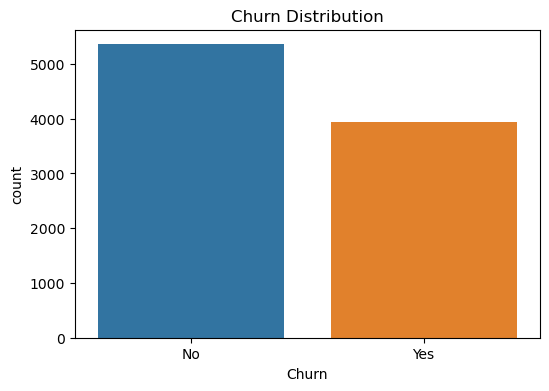

In [198]:
# Churn Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()

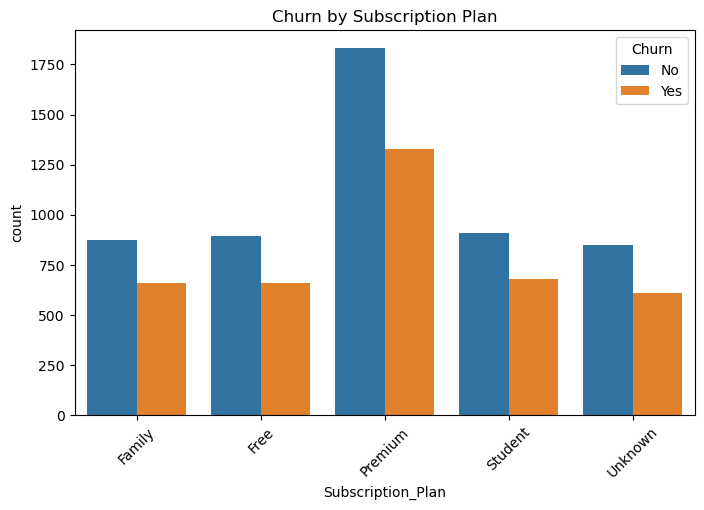

In [199]:
# Churn by Subscription plan
plt.figure(figsize=(8,5))
sns.countplot(x='Subscription_Plan', hue='Churn', data=df)
plt.title("Churn by Subscription Plan")
plt.xticks(rotation=45)
plt.show()

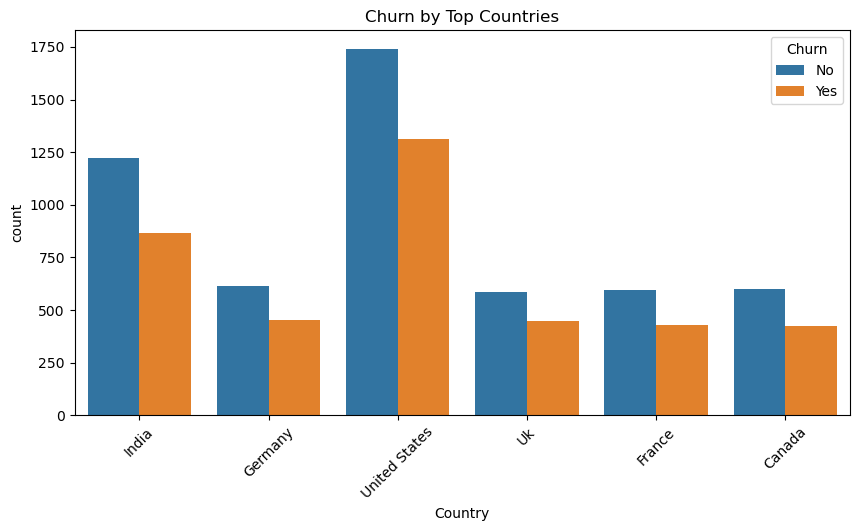

In [200]:
# Churn by Country(Top 10)
top_countries = df['Country'].value_counts().head(10).index
plt.figure(figsize=(10,5))
sns.countplot(x='Country', hue='Churn', data=df[df['Country'].isin(top_countries)])
plt.title("Churn by Top Countries")
plt.xticks(rotation=45)
plt.show()

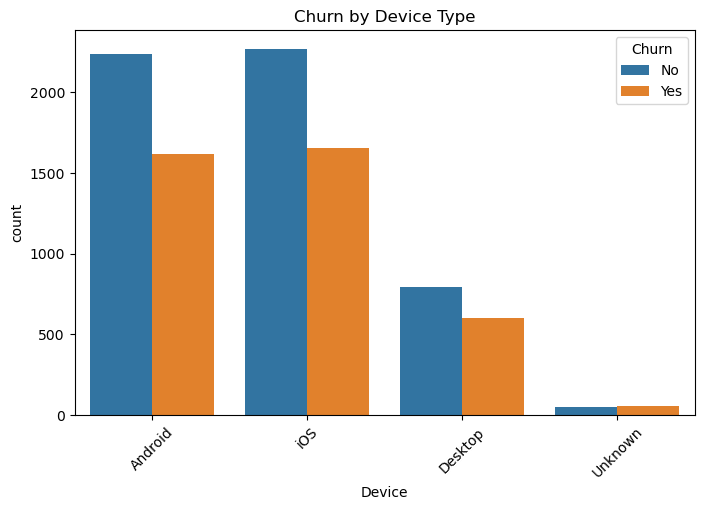

In [201]:
# Chrun by Device
plt.figure(figsize=(8,5))
sns.countplot(x='Device', hue='Churn', data=df)
plt.title("Churn by Device Type")
plt.xticks(rotation=45)
plt.show()

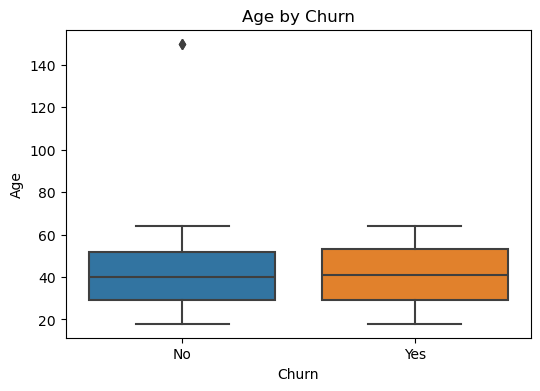

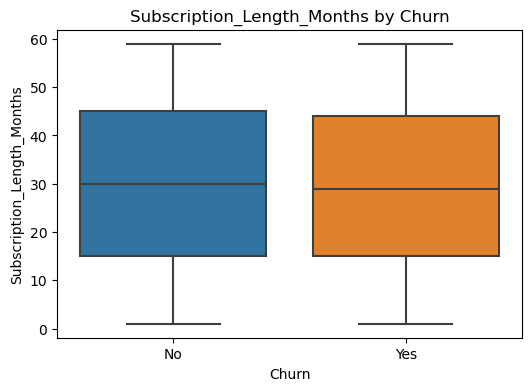

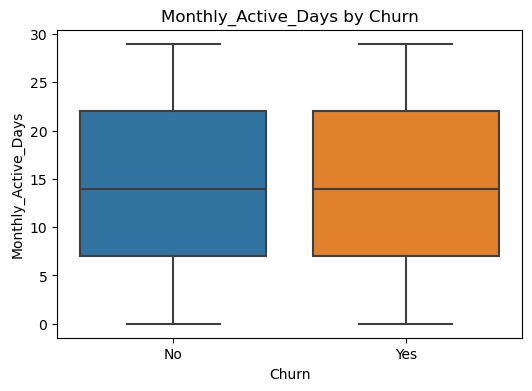

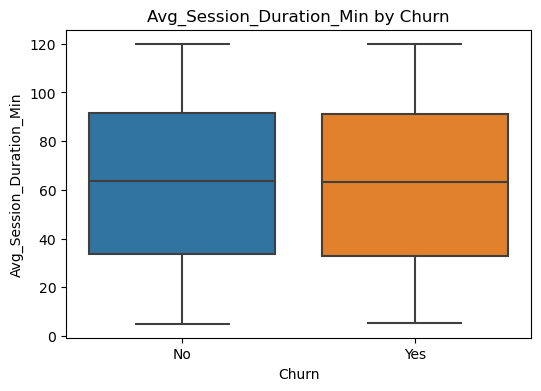

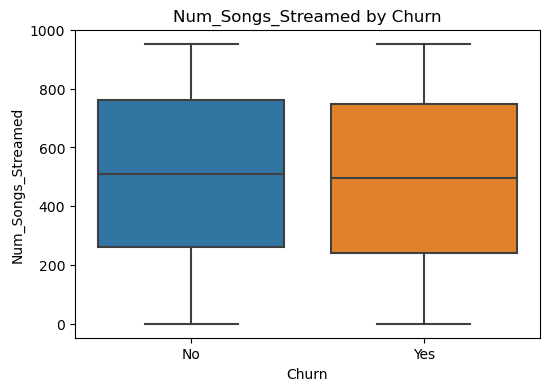

In [202]:
# Numeric features by Churn
numeric_features = ['Age', 'Subscription_Length_Months', 'Monthly_Active_Days', 'Avg_Session_Duration_Min', 'Num_Songs_Streamed']

for feature in numeric_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Churn', y=feature, data=df)
    plt.title(f"{feature} by Churn")
    plt.show()

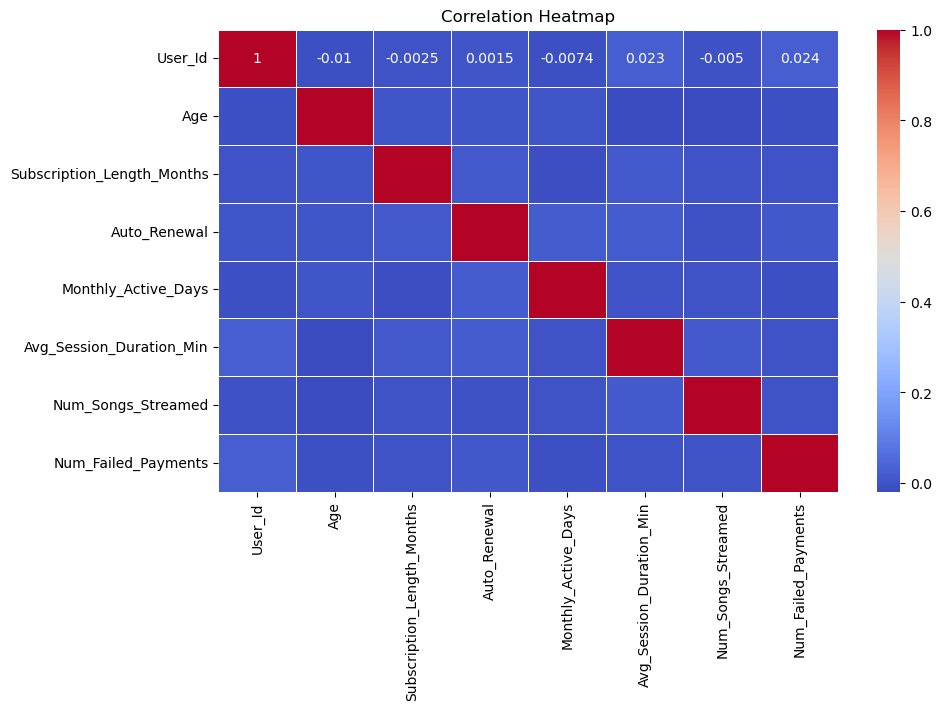

In [203]:
# Correlation heatmap(for numeric features)
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


C:\Users\Harmandeep Kaur\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Harmandeep Kaur\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Harmandeep Kaur\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


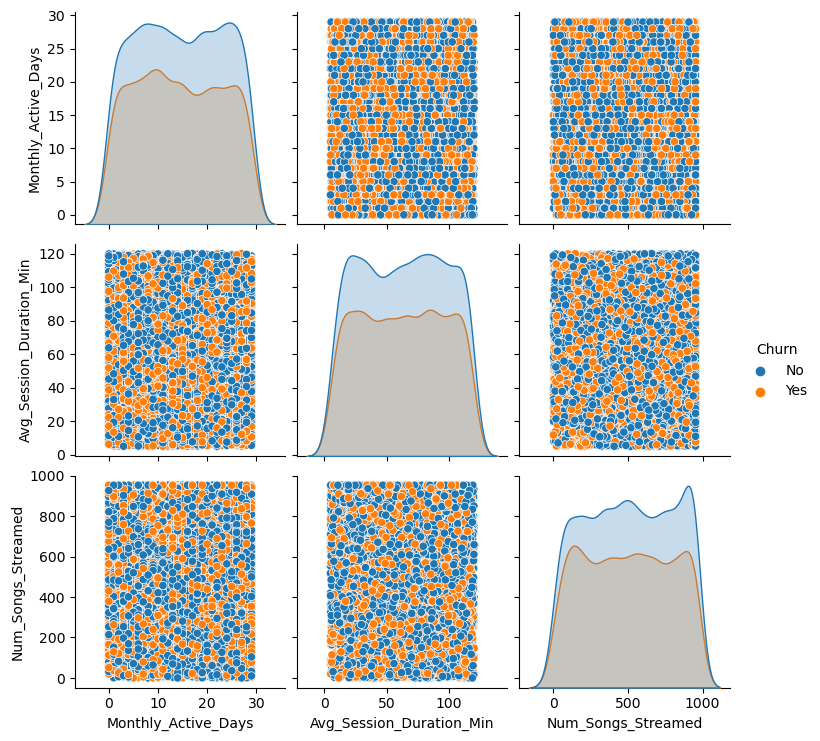

In [204]:
# Pairplot
sns.pairplot(df, vars=['Monthly_Active_Days', 'Avg_Session_Duration_Min', 'Num_Songs_Streamed'], hue='Churn')


In [205]:
# Churn Rate(%) across categories
churn_rate_by_plan = df.groupby('Subscription_Plan')['Churn'].value_counts(normalize=True).unstack().fillna(0)
print((churn_rate_by_plan * 100).round(2))  # percentage

Churn                 No    Yes
Subscription_Plan              
Family             57.05  42.95
Free               57.51  42.49
Premium            57.98  42.02
Student            57.30  42.70
Unknown            58.19  41.81


## Exploratory Data Analysis (EDA) Summary
**1. Dataset Overview**
- Displayed basic structure using .shape, .info(), and .describe()
- Purpose:
  - Check data types and non-null counts
  - Summarize statistics of numerical and categorical columns
  - Confirm missing values and detect anomalies

**2. Churn Distribution**
- Visualized class balance using sns.countplot(x='Churn')
- Purpose:
  - Identify if the target variable (churn) is balanced
  - Important for choosing appropriate modeling strategies later

**3. Churn by Subscription Plan**
- Plotted churn counts grouped by Subscription_Plan
- Purpose:
  - Evaluate if specific plan types are more or less likely to churn
  - Detect loyalty patterns among Premium, Family, or Student users

**4. Churn by Country (Top 10 Countries)**
- Filtered and visualized churn patterns across the top 10 countries
- Purpose:
  - Analyze geographical trends in churn behavior
  - Highlight regions with retention challenges

**5. Churn by Device**
- Compared churn across device types (iOS, Android, Desktop, etc.)
- Purpose:
  - Detect whether users on certain platforms are more likely to churn
  - Could hint at platform-specific issues or usability differences

**6. Boxplots: Numeric Features by Churn**
- Visualized relationships between churn and:
  - Age
  - Subscription_Length_Months
  - Monthly_Active_Days
  - Avg_Session_Duration_Min
  - Num_Songs_Streamed
- Purpose:
  - Identify behavior differences between churned and retained users
  - Detect outliers and understand feature spread by group


## Feature Selection

In [206]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Load the cleaned dataset
df = pd.read_csv('cleaned_spotify_churn.csv')

In [207]:
# One-Hot Encode Categorical Variables
df = pd.get_dummies(
    df,
    columns=['Country', 'Device', 'Subscription_Plan', 'Payment_Method'],
    prefix=['Country', 'Device', 'Plan', 'PayMethod']
)

In [208]:
# Create Binary Target Column and Drop Text Target
df['Churn_Binary'] = df['Churn'].map({'Yes': 1, 'No': 0})
df.drop('Churn', axis=1, inplace=True)

In [209]:
# Save csv file with churn binary
df.to_csv("cleaned_spotify_churn_binary.csv", index=False)

In [210]:
# Read csv file
df = pd.read_csv("cleaned_spotify_churn_binary.csv")

In [211]:
# Standardize Numeric Features
numeric_cols = ['Age', 'Subscription_Length_Months', 'Monthly_Active_Days', 'Avg_Session_Duration_Min', 'Num_Songs_Streamed', 'Num_Failed_Payments']

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [212]:
# Train-Test Split
X = df.drop('Churn_Binary', axis=1)
y = df['Churn_Binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (7428, 30)
Testing set shape: (1858, 30)


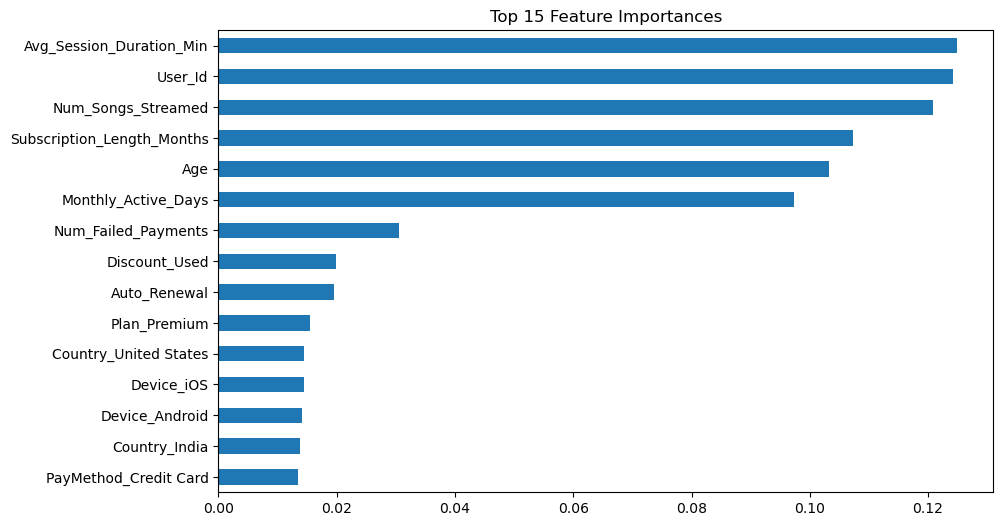

In [213]:
# Feature Importance Analysis
model = RandomForestClassifier(class_weight = 'balanced', random_state=42)
model.fit(X_train, y_train)

importances = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot top 15 features
plt.figure(figsize=(10,6))
importances.head(15).plot(kind='barh')
plt.title("Top 15 Feature Importances")
plt.gca().invert_yaxis()
plt.show()

## Modeling

#### Baseline Model Training & Evaluation

In [214]:
from sklearn.metrics import classification_report

In [215]:
# Logistic Regression
log_model = LogisticRegression(class_weight = 'balanced', max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)

print("Logistic Regression Report:")
print(classification_report(y_test, log_pred))

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1081
           1       0.42      1.00      0.59       777

    accuracy                           0.42      1858
   macro avg       0.21      0.50      0.29      1858
weighted avg       0.17      0.42      0.25      1858



C:\Users\Harmandeep Kaur\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Harmandeep Kaur\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Harmandeep Kaur\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [216]:
# Random Forest
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)
rf_pred = model.predict(X_test)

print("Random Forest Report:")
print(classification_report(y_test, rf_pred))

Random Forest Report:
              precision    recall  f1-score   support

           0       0.59      0.88      0.71      1081
           1       0.48      0.16      0.24       777

    accuracy                           0.58      1858
   macro avg       0.54      0.52      0.47      1858
weighted avg       0.55      0.58      0.51      1858



#### Hyperparameter Tuning

In [217]:
from sklearn.model_selection import GridSearchCV

# Logistic Regression tuning
log_params = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l2'], 'solver': ['lbfgs']}
log_grid = GridSearchCV(LogisticRegression(class_weight='balanced', max_iter=1000), log_params, cv=5, scoring='f1')
log_grid.fit(X_train, y_train)

# Random Forest tuning
rf_params = {'n_estimators': [100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5]}
rf_grid = GridSearchCV(RandomForestClassifier(class_weight='balanced', random_state=42), rf_params, cv=5, scoring='f1')
rf_grid.fit(X_train, y_train)

print("Best Logistic Regression Parameters:", log_grid.best_params_)
print("Best Random Forest Parameters:", rf_grid.best_params_)

Best Logistic Regression Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Random Forest Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}


#### Final Evaluation of Tuned Models

In [218]:
from sklearn.metrics import confusion_matrix

# Predictions from best estimators
log_best_pred = log_grid.predict(X_test)
rf_best_pred = rf_grid.predict(X_test)

print("Tuned Logistic Regression Report:")
print(classification_report(y_test, log_best_pred))

print("Tuned Random Forest Report:")
print(classification_report(y_test, rf_best_pred))

Tuned Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1081
           1       0.42      1.00      0.59       777

    accuracy                           0.42      1858
   macro avg       0.21      0.50      0.29      1858
weighted avg       0.17      0.42      0.25      1858

Tuned Random Forest Report:
              precision    recall  f1-score   support

           0       0.58      0.63      0.60      1081
           1       0.41      0.36      0.38       777

    accuracy                           0.51      1858
   macro avg       0.49      0.49      0.49      1858
weighted avg       0.51      0.51      0.51      1858



C:\Users\Harmandeep Kaur\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Harmandeep Kaur\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Harmandeep Kaur\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


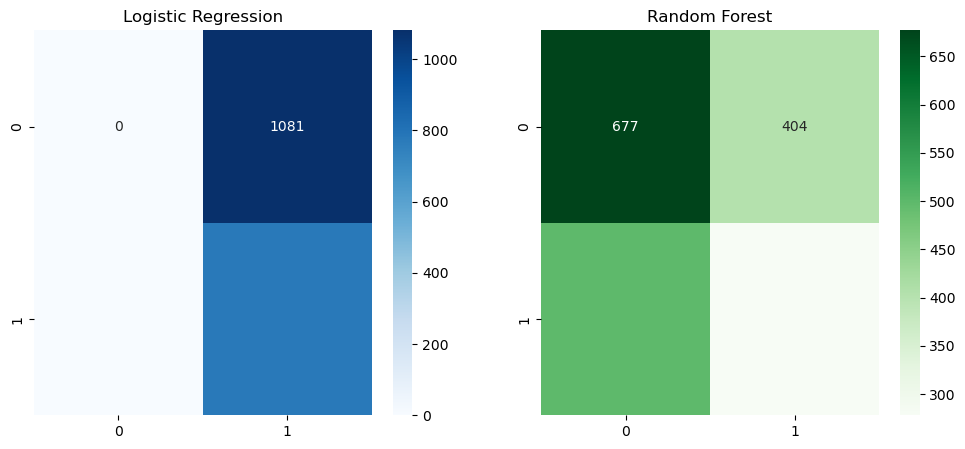

In [219]:
# Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(confusion_matrix(y_test, log_best_pred), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Logistic Regression')

sns.heatmap(confusion_matrix(y_test, rf_best_pred), annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Random Forest')

plt.show()

In [220]:
# Compare Classification Metrics: Logistic Regression vs Random Forest (Tuned Models)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Logistic Regression metrics (using best estimator)
log_metrics = {
    'Model': 'Logistic Regression (Tuned)',
    'Accuracy': accuracy_score(y_test, log_best_pred),
    'Precision': precision_score(y_test, log_best_pred, zero_division=0),
    'Recall': recall_score(y_test, log_best_pred, zero_division=0),
    'F1 Score': f1_score(y_test, log_best_pred, zero_division=0)
}

# Random Forest metrics (using best estimator)
rf_metrics = {
    'Model': 'Random Forest (Tuned)',
    'Accuracy': accuracy_score(y_test, rf_best_pred),
    'Precision': precision_score(y_test, rf_best_pred),
    'Recall': recall_score(y_test, rf_best_pred),
    'F1 Score': f1_score(y_test, rf_best_pred)
}

# Combine into DataFrame
metrics_df = pd.DataFrame([log_metrics, rf_metrics])
display(metrics_df)

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (Tuned),0.418192,0.418192,1.000000,0.589753
1,Random Forest (Tuned),0.513994,0.407625,0.357786,0.381083


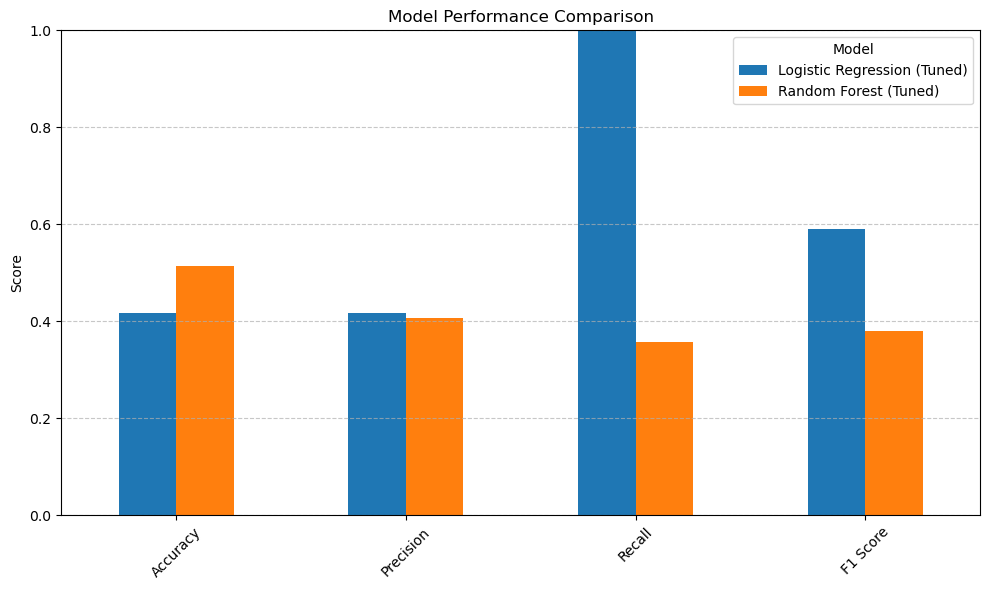

In [221]:
# Visualize Metrics Comparison for Logistic Regression vs Random Forest
# Create bar chart
metrics_plot_df = metrics_df.set_index('Model').T

metrics_plot_df.plot(kind='bar', figsize=(10, 6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Model')
plt.tight_layout()
plt.show()

In [222]:
# ✅ Feature Engineering
df['Activity_Ratio'] = df['Num_Songs_Streamed'] / df['Subscription_Length_Months']
df['Engagement_Score'] = df['Monthly_Active_Days'] * df['Avg_Session_Duration_Min']
df['Lifetime'] = df['Subscription_Length_Months'] * 30  # Assuming 30 days/month
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(0, inplace=True)

In [224]:
# ✅ SMOTE and Top Feature Selection using Feature Importance
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

# Redefine target and features
X = df.drop(columns='Churn_Binary')
y = df['Churn_Binary']

# One-hot encoding (if not already done)
X = pd.get_dummies(X)

# Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

# SMOTE
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Initial RF for feature importance
rf_temp = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_temp.fit(X_train_sm, y_train_sm)

# Top 15 features
importances = rf_temp.feature_importances_
feat_imp_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
top_features = feat_imp_df.sort_values(by='Importance', ascending=False).head(15)['Feature'].tolist()

X_train_top = X_train_sm[top_features]
X_test_top = X_test[top_features]

In [225]:
# ✅ Random Forest Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced', 'balanced_subsample']
}

rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring='f1')
rf_grid.fit(X_train_top, y_train_sm)

rf_best_pred = rf_grid.predict(X_test_top)


In [226]:
# ✅ Evaluation After Improvements
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

print("Improved Random Forest Classification Report:")
print(classification_report(y_test, rf_best_pred))

rf_metrics_updated = {
    'Model': 'Random Forest (Improved)',
    'Accuracy': accuracy_score(y_test, rf_best_pred),
    'Precision': precision_score(y_test, rf_best_pred),
    'Recall': recall_score(y_test, rf_best_pred),
    'F1 Score': f1_score(y_test, rf_best_pred)
}
print("\nUpdated Metrics:")
print(rf_metrics_updated)

Improved Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.67      0.61      1339
           1       0.40      0.30      0.34       983

    accuracy                           0.51      2322
   macro avg       0.48      0.49      0.48      2322
weighted avg       0.50      0.51      0.50      2322


Updated Metrics:
{'Model': 'Random Forest (Improved)', 'Accuracy': 0.5133505598621878, 'Precision': 0.40054127198917455, 'Recall': 0.301119023397762, 'F1 Score': 0.3437862950058072}


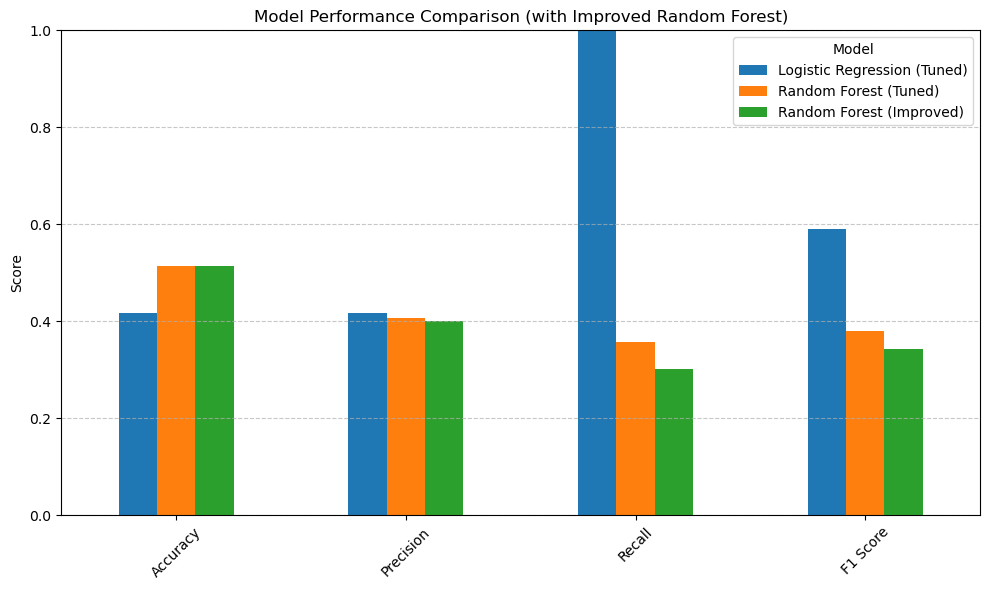

In [227]:
# 📊 Visualize Updated Random Forest Performance

# Create DataFrame for updated model
updated_metrics_df = pd.DataFrame([rf_metrics_updated])

# Combine with previous metrics if available
try:
    combined_metrics = pd.concat([metrics_df, updated_metrics_df], ignore_index=True)
except:
    combined_metrics = updated_metrics_df

# Plot
combined_plot_df = combined_metrics.set_index('Model').T
combined_plot_df.plot(kind='bar', figsize=(10, 6))
plt.title("Model Performance Comparison (with Improved Random Forest)")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Model')
plt.tight_layout()
plt.show()